In [474]:
!pwd

/Users/user/DataScience/transit-lines-casestudy/notebooks


In [3]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
transit = ['../data/transit_lines/cities.csv', '../data/transit_lines/lines.csv', 
           '../data/transit_lines/station_lines.csv', '../data/transit_lines/stations.csv', 
           '../data/transit_lines/systems.csv', '../data/transit_lines/track_lines.csv', 
           '../data/transit_lines/tracks.csv']
cities, lines, station_lines, stations, systems, track_lines, tracks = [pd.read_csv(i) for i in transit]


In [4]:
top_city_ids = [114, 91, 206, 95, 1, 78, 139, 82, 4, 71]
Top_city = ['Tokyo', 'Osaka', 'New York', 'Paris','Buenos Aires','Mexico City', 'Boston', 'Munich', 'Santiago', 'Madrid']
stations=stations.dropna(subset=['closure','name','opening'])
top_ten = pd.DataFrame(stations.groupby('city_id').count()['id'].sort_values(ascending=False)[:10])
top_ten['city_id'] = top_ten.index
top_ten['City'] = Top_city
top_ten.rename(columns={'id': 'Number of Stations'}, inplace=True)
top_ten



,Number of Stations,city_id,City
city_id,,,
114,3335,114,Tokyo
91,1278,91,Osaka
206,1146,206,New York
95,893,95,Paris
1,598,1,Buenos Aires
78,467,78,Mexico City
139,372,139,Boston
82,369,82,Munich
4,324,4,Santiago


In [5]:
top_station = stations.loc[(stations['city_id'] == 114) | (stations['city_id'] == 91)| (stations['city_id'] == 206) | (stations['city_id'] == 95) | (stations['city_id'] == 1) | (stations['city_id'] == 78) | (stations['city_id'] == 139) | (stations['city_id'] == 82) | (stations['city_id'] == 4) | (stations['city_id'] == 71)]
top_station = top_station.dropna()
top_station['duration'] = top_station['opening'] - top_station['buildstart']

In [478]:
top_station

,id,name,geometry,buildstart,opening,closure,city_id,duration
0,7694,Keisei Tsudanuma,POINT(140.024812197129 35.6837744784723),1921.0,1921.0,999999.0,114,0.0
3,7695,Keisei Makuhari-Hongo,POINT(140.042146725175 35.6726021159981),1991.0,1991.0,999999.0,114,0.0
5,7696,Keisei Makuhari,POINT(140.056077093286 35.6605591225961),1921.0,1921.0,999999.0,114,0.0
7,7697,Kemigawa,POINT(140.066304589107 35.6526280375642),1921.0,1921.0,999999.0,114,0.0
9,7698,Keisei Inage,POINT(140.085607402414 35.6378035803563),1921.0,1921.0,999999.0,114,0.0
...,...,...,...,...,...,...,...,...
15789,16554,Shinomiya,POINT(135.823937214498 34.9918683039252),1912.0,1912.0,999999.0,91,0.0
15790,16555,Keihan Yamashina,POINT(135.816689306704 34.992068923936),1912.0,1912.0,999999.0,91,0.0
15791,16556,Hino-oka,POINT(135.799931852138 34.9968986641574),1912.0,1912.0,1997.0,91,0.0
15792,16557,Kujoyama,POINT(135.792375683554 35.0018274164674),1936.0,1936.0,1997.0,91,0.0


In [6]:
avg_duration = top_station.groupby('city_id').mean()['duration']

In [8]:
earliest = top_station.groupby('city_id')['opening'].min()
earliest

city_id
1      1857.0
4         0.0
71     1919.0
78     1969.0
82        0.0
91     1874.0
95        0.0
114    1872.0
139    1834.0
206    1837.0
Name: opening, dtype: float64

In [482]:
top_ten['First Opening'] = earliest

In [483]:
top_ten

,Number of Stations,city_id,City,First Opening
city_id,,,,
114,3335,114,Tokyo,1872.0
91,1278,91,Osaka,1874.0
206,1146,206,New York,1837.0
95,893,95,Paris,0.0
1,598,1,Buenos Aires,1857.0
78,467,78,Mexico City,1969.0
139,372,139,Boston,1834.0
82,369,82,Munich,0.0
4,324,4,Santiago,0.0


In [484]:
top_ten['Average Stations Per Year'] = top_ten['Number of Stations'] / (2019 - top_ten['First Opening'])
top_ten

,Number of Stations,city_id,City,First Opening,Average Stations Per Year
city_id,,,,,
114,3335,114,Tokyo,1872.0,22.687075
91,1278,91,Osaka,1874.0,8.813793
206,1146,206,New York,1837.0,6.296703
95,893,95,Paris,0.0,0.442298
1,598,1,Buenos Aires,1857.0,3.691358
78,467,78,Mexico City,1969.0,9.340000
139,372,139,Boston,1834.0,2.010811
82,369,82,Munich,0.0,0.182764
4,324,4,Santiago,0.0,0.160475


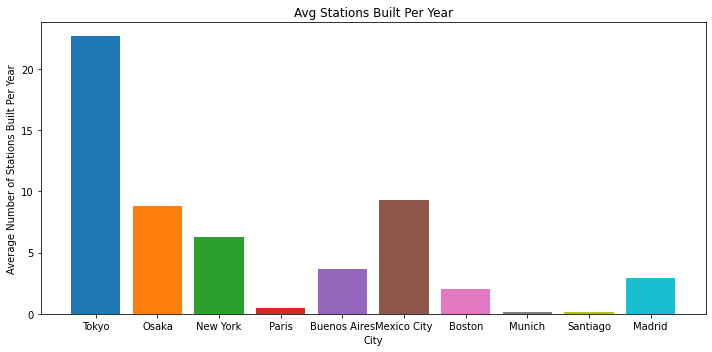

In [486]:
fig, ax = plt.subplots()
ax.set_title('Avg Stations Built Per Year')
fig.set_size_inches(10, 5)
ax.set_xlabel('City')
ax.set_ylabel('Average Number of Stations Built Per Year')
ax.bar(Top_city, top_ten['Average Stations Per Year'], color =['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', 
     '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', 
     '#bcbd22', '#17becf'])
fig.tight_layout()
plt.savefig('../images/Avg_stations_per_year.png')
